<a href="https://colab.research.google.com/github/albanda/CE888/blob/master/lab2%20-%20bootstrap/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [3]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
	bootS_array = np.random.choice(x,(n_bootstraps, sample_size))
	data_mean = np.mean(bootS_array)
	bootStraps_mean = np.mean(bootS_array, axis=1)
	lower = np.percentile(bootStraps_mean, 2.5)
	upper = np.percentile(bootStraps_mean, 97.5)
	return data_mean, lower, upper


/Users/Enterprise/opt/anaconda3/envs/pandasenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 50000.0)

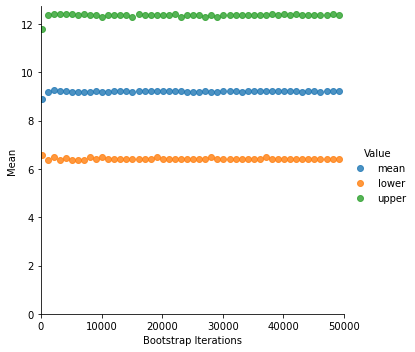

In [4]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [5]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
	bootS_array = np.random.choice(sample,(n_bootstraps, sample_size))
	data_mean = np.mean(bootS_array)
	bootStraps_mean = np.mean(bootS_array, axis=1)
	lower = np.percentile(bootStraps_mean, (100-ci)/2)
	upper = np.percentile(bootStraps_mean, (ci+(100-ci)/2))
	return data_mean, lower, upper

/Users/Enterprise/opt/anaconda3/envs/pandasenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 50000.0)

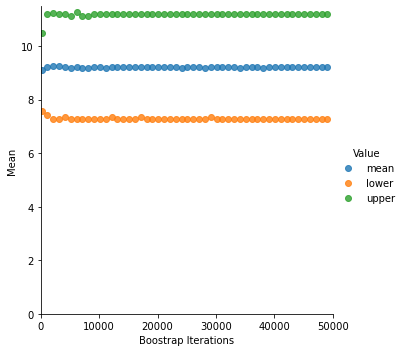

In [6]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


In [7]:
# Confidence interval 
def bootstrap_std_ci(sample, sample_size, n_bootstraps, ci):
	bootS_array = np.random.choice(sample,(n_bootstraps, sample_size))
	data_mean = np.std(bootS_array)
	bootStraps_mean = np.std(bootS_array, axis=1)
	lower = np.percentile(bootStraps_mean, (100-ci)/2)
	upper = np.percentile(bootStraps_mean, (ci+(100-ci)/2))
	return data_mean, lower, upper

In [8]:
print(bootstrap_std_ci(data, data.shape[0], 10000, 90))

(5.695484656519851, 3.0338229402279002, 7.121485875303479)


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [9]:
# Load and visualise the vehicles dataset
df = pd.read_csv('vehicles.csv')
df.head()
dfCurr = df.iloc[:,0]
dfNew = df.iloc[:,1]
dfNew = dfNew.dropna()
dataCurr = dfCurr.values
dataNew = dfNew.values

# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# sns.scatterplot(data=df, x="Current fleet")
# Note: you can add more cells as needed to organise your code and your plots


In [10]:
## Compare the two fleets

# The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
# 1. Calculate the mean of both samples.
# 2. Using the bootstrap function that you created:
#     - Construct the 95% CI of the mean of the current fleet.
#     - Construct the 95% CI of the mean of the new fleet.
#     - Are they comparable? (i.e., is one better than the other?) -- p-test

In [12]:
current_mean, new_mean = np.mean(df, axis=0)
print(current_mean, new_mean)
print("Current fleet: " + str(bootstrap_mean_ci(dataCurr, dataCurr.shape[0], 10000, 95)))
print("New fleet: " + str(bootstrap_mean_ci(dataNew, dataCurr.shape[0], 10000, 95)))


20.14457831325301 30.481012658227847
Current fleet: (20.14870562248996, 19.36144578313253, 20.947791164658636)
New fleet: (30.484800803212853, 29.730923694779115, 31.228915662650603)


In [13]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    tObs = np.mean(sample2) - np.mean(sample1)
    pValue = 0
    concat = np.concatenate((sample1,sample2))
    for i in range(n_permutations):
        perm = np.random.permutation(concat)
        nSample1 = perm[:len(sample1)]
        nSample2 = perm[len(sample2):]

        if (np.mean(nSample2)-np.mean(nSample1)) > tObs:
            pValue += 1
    return pValue/n_permutations

In [14]:
print("p-value for vehicle data set at 30000 iterations is: " + str(permut_test(dataCurr, dataNew, 30000)))

p-value for vehicle data set at 30000 iterations is: 0.0


In [15]:
# If an alpha of 0.5 is assumed, a p-value of 0.0 indicates that we can refute the H0 hypothesis.

In [16]:
# The 95% confidence interval for the mean of the new fleet in the vehicles dataset using 10000 iteration
print(bootstrap_mean_ci(dataNew, dataNew.shape[0], 10000, 95))

(30.482702531645568, 29.11392405063291, 31.82278481012658)


In [17]:
# The 80% confidence interval for the mean of the old fleet in the vehicles dataset using 10000 iterations
print(bootstrap_mean_ci(dataCurr, dataCurr.shape[0], 10000, 80))

(20.14384417670683, 19.622489959839356, 20.662650602409638)


In [18]:
# The 73% confidence interval for the standard deviation of the old fleet in the vehicles dataset using 10000 iterations
print(bootstrap_std_ci(dataCurr, dataCurr.shape[0], 10000, 73))

(6.399288347168303, 6.06524910038339, 6.700267009617946)
